In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("keyushnisar/dating-app-behavior-dataset")

print("Path to dataset files:", path)

In [31]:
import pandas as pd

DataPath = r''
DataPath = DataPath.replace('\\', '/')
DatingAppBehavior = pd.read_csv(DataPath + '/dating_app_behavior_dataset.csv')
DatingAppBehavior.head()
# DatingAppBehavior.describe()
# DatingAppBehavior.info()

,gender,sexual_orientation,location_type,income_bracket,education_level,interest_tags,app_usage_time_min,app_usage_time_label,swipe_right_ratio,swipe_right_label,likes_received,mutual_matches,profile_pics_count,bio_length,message_sent_count,emoji_usage_rate,last_active_hour,swipe_time_of_day,match_outcome
0,Prefer Not to Say,Gay,Urban,High,Bachelor’s,"Fitness, Politics, Traveling",52,Moderate,0.60,Optimistic,173,23,4,44,75,0.36,13,Early Morning,Mutual Match
1,Male,Bisexual,Suburban,Upper-Middle,No Formal Education,"Languages, Fashion, Parenting",279,Extreme User,0.56,Optimistic,107,7,3,301,35,0.42,0,Morning,Chat Ignored
2,Non-binary,Pansexual,Suburban,Low,Master’s,"Movies, Reading, DIY",49,Moderate,0.41,Optimistic,91,27,2,309,33,0.41,1,After Midnight,Date Happened
3,Genderfluid,Gay,Metro,Very Low,Postdoc,"Coding, Podcasts, History",185,Extreme User,0.32,Balanced,147,6,5,35,5,0.07,21,Morning,No Action
4,Male,Bisexual,Urban,Middle,Bachelor’s,"Clubbing, Podcasts, Cars",83,High,0.32,Balanced,94,11,1,343,34,0.11,22,After Midnight,One-sided Like


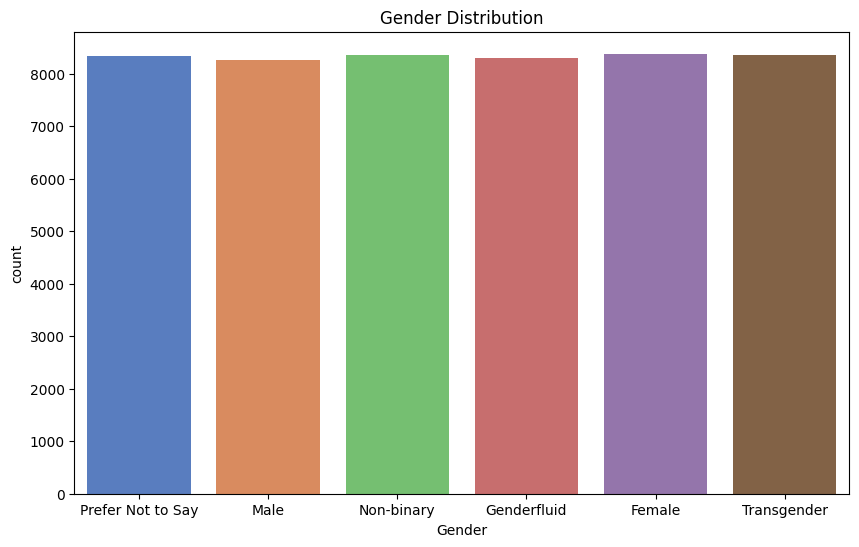

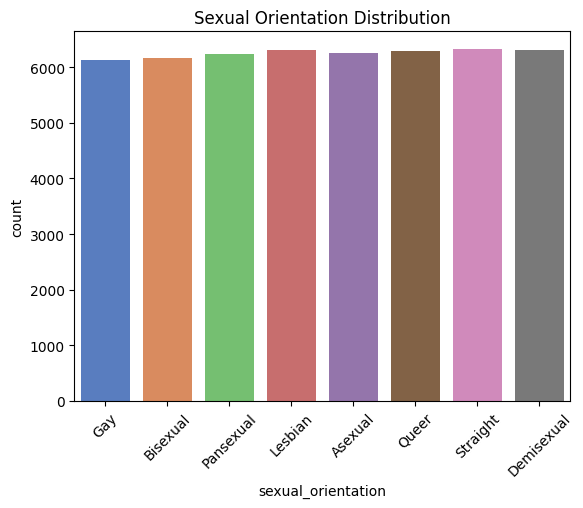

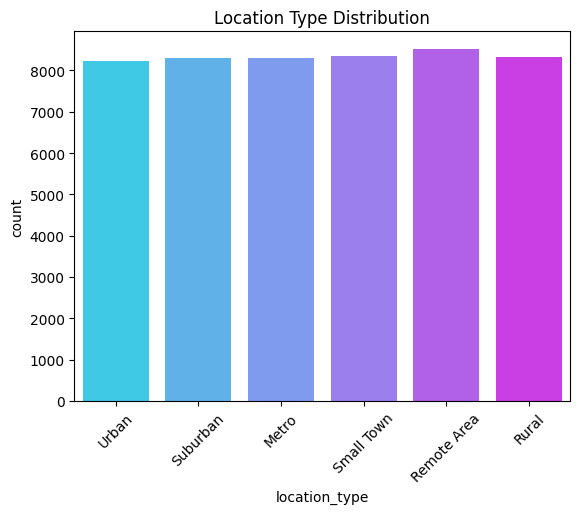

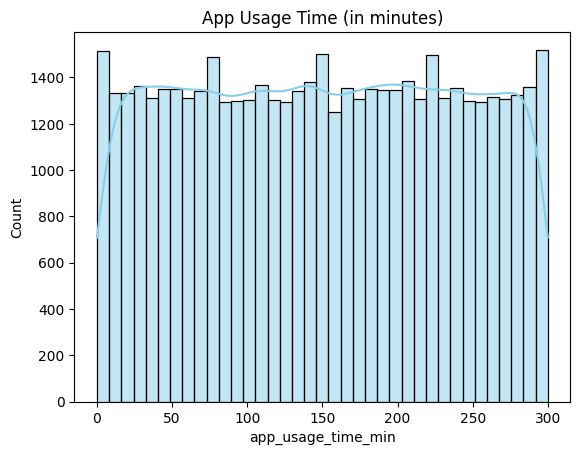

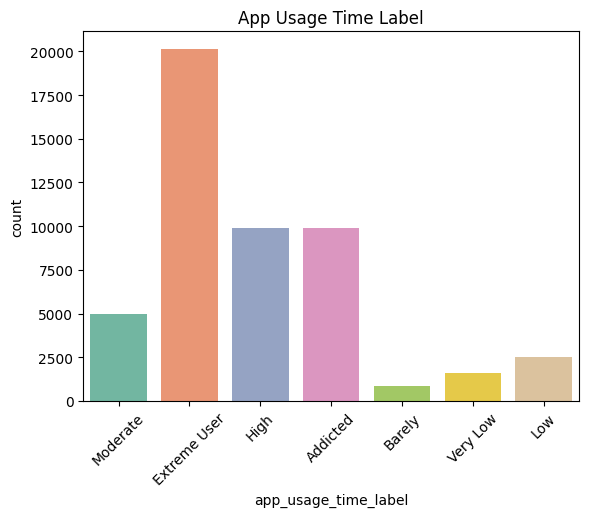

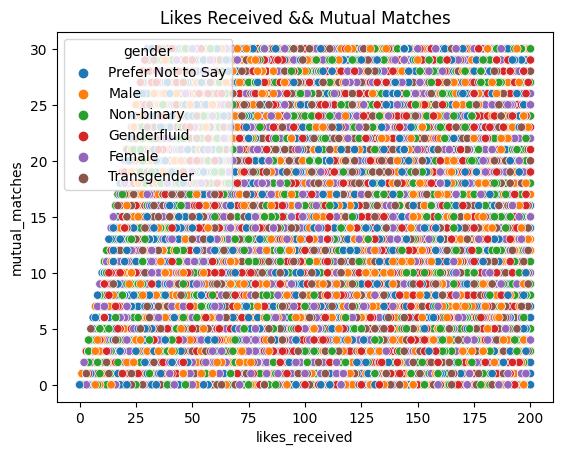

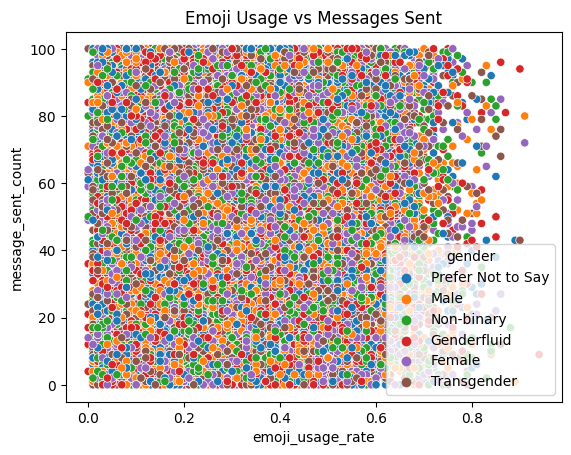

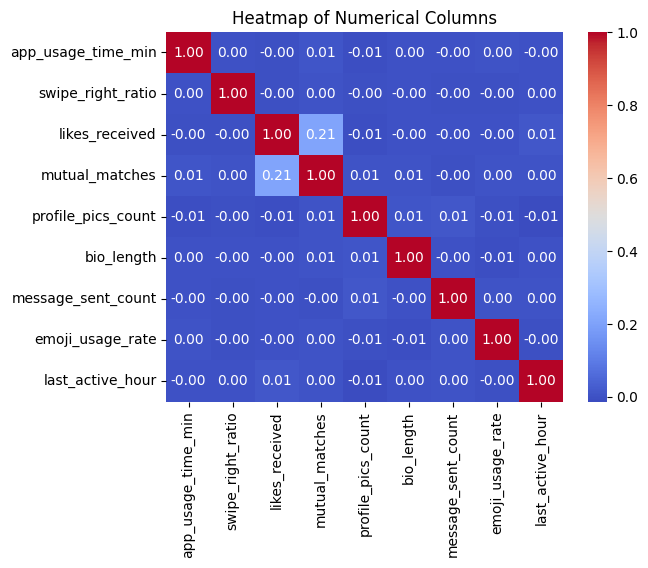

In [45]:
# Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt

## gender
plt.figure(figsize=(10,6))
sns.countplot(data=DatingAppBehavior, x='gender', palette='muted')
plt.title("Gender Distribution")
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

## sexual_orientation
sns.countplot(data=DatingAppBehavior, x='sexual_orientation', palette='muted')
plt.title("Sexual Orientation Distribution")
plt.xticks(rotation=45)
plt.show()

## location_type
sns.countplot(data=DatingAppBehavior, x='location_type', palette='cool')
plt.title("Location Type Distribution")
plt.xticks(rotation=45)
plt.show()

## app_usage_time_min
sns.histplot(DatingAppBehavior['app_usage_time_min'], kde=True, color='skyblue')
plt.title('App Usage Time (in minutes)')
plt.show()
## app_usage_time_label
sns.countplot(DatingAppBehavior, x='app_usage_time_label',palette='Set2')
plt.title('App Usage Time Label')
plt.xticks(rotation=45)
plt.show()

## Likes Received && Mutual Matches
sns.scatterplot(DatingAppBehavior, x='likes_received', y='mutual_matches', hue='gender')
plt.title('Likes Received && Mutual Matches')
plt.show()

## Emoji Usage vs Messages Sent
sns.scatterplot(DatingAppBehavior, x='emoji_usage_rate', y='message_sent_count', hue='gender')
plt.title('Emoji Usage vs Messages Sent')
plt.show()

## Heatmap of Numerical Columns
num_cols = DatingAppBehavior.select_dtypes(include='number')
corr = num_cols.corr()
sns.heatmap(corr, annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()


 Logistic Regression
Accuracy:  9.85%

 Decision Tree
Accuracy:  9.83%

 Random Forest
Accuracy:  10.05%

 Support Vector Machine
Accuracy:  9.92%

 Naive Bayes
Accuracy:  9.70%

 K-Nearest Neighbors
Accuracy:  9.92%


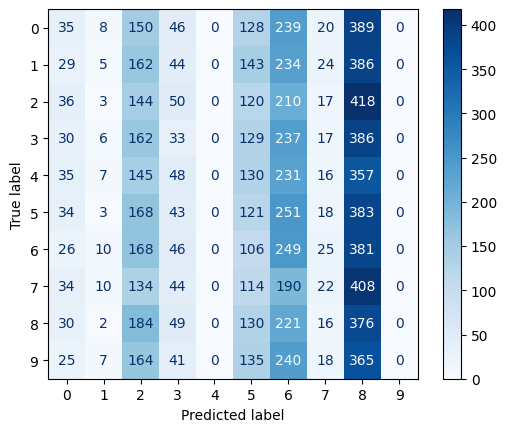

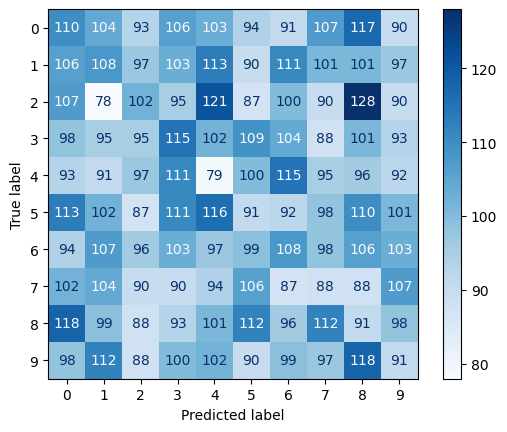

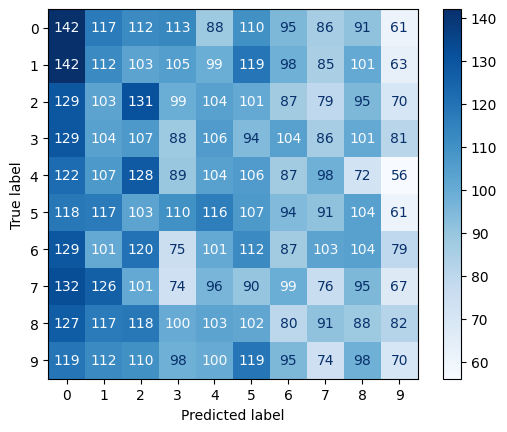

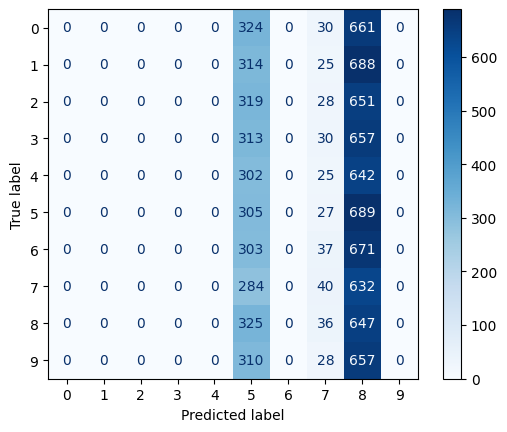

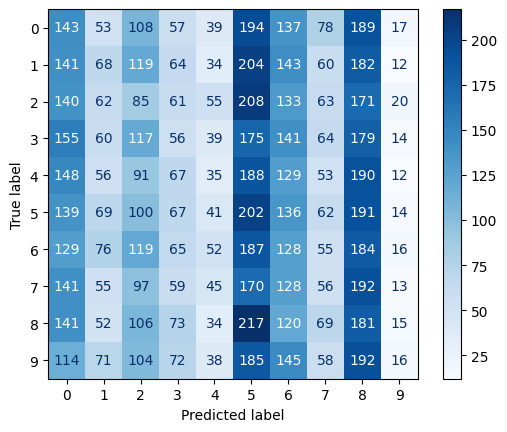

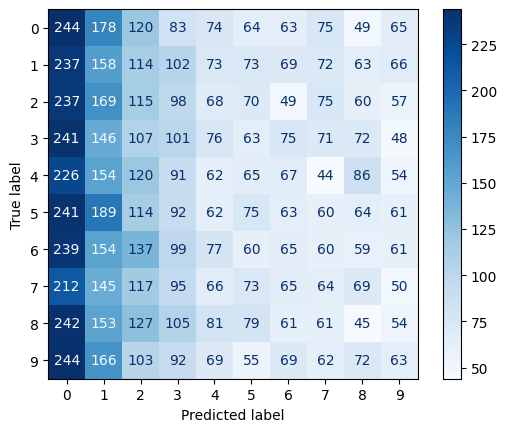

In [46]:
# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Target Variable
target = 'match_outcome'
# Encode categorical variables
DatingAppBehavior_encoded = DatingAppBehavior.copy()
le = LabelEncoder()

for col in DatingAppBehavior_encoded.select_dtypes(include='object').columns:
    DatingAppBehavior_encoded[col] = le.fit_transform(DatingAppBehavior_encoded[col])

X = DatingAppBehavior_encoded.drop(columns=[target])
y = DatingAppBehavior_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

results = {}

def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc * 100

    print(f"\n {name}")
    print(f"Accuracy: {acc * 100: .2f}%")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')

for name, model in models.items():
    evaluate_model(name, model)

In [47]:
DatingAppBehavior_acc = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy (%)'])
DatingAppBehavior_acc = DatingAppBehavior_acc.sort_values(by='Accuracy (%)', ascending=False).reset_index(drop=True)
print("\n Accuracy Summary")
print(DatingAppBehavior_acc)


 Accuracy Summary
                    Model  Accuracy (%)
0           Random Forest         10.05
1  Support Vector Machine          9.92
2     K-Nearest Neighbors          9.92
3     Logistic Regression          9.85
4           Decision Tree          9.83
5             Naive Bayes          9.70
